In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df_01 = pd.read_csv("../data/selected_M_best10.csv")
df_01 = df_01.drop_duplicates()
print(df_01.head())

   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0        0                       582         0                 20   
1        0                      7861         0                 38   
2        0                       146         0                 20   
3        1                       111         0                 20   
4        1                       160         1                 20   

   high_blood_pressure  serum_creatinine  serum_sodium  sex  smoking  time  \
0                    1               1.9           130    1        0     4   
1                    0               1.1           136    1        0     6   
2                    0               1.3           129    1        1     7   
3                    0               1.9           137    1        0     7   
4                    0               2.7           116    0        0     8   

   Results  
0        1  
1        1  
2        1  
3        1  
4        1  


In [3]:
df_01.describe()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,Results
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,0.431438,581.839465,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,0.496107,970.287881,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,0.000000,23.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,0.000000,116.500000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,0.000000,250.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,1.000000,582.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,1.000000,7861.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df_features = list(df_01.columns)
print(df_features)

['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'Results']


In [5]:
df_01.columns

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time', 'Results'],
      dtype='object')

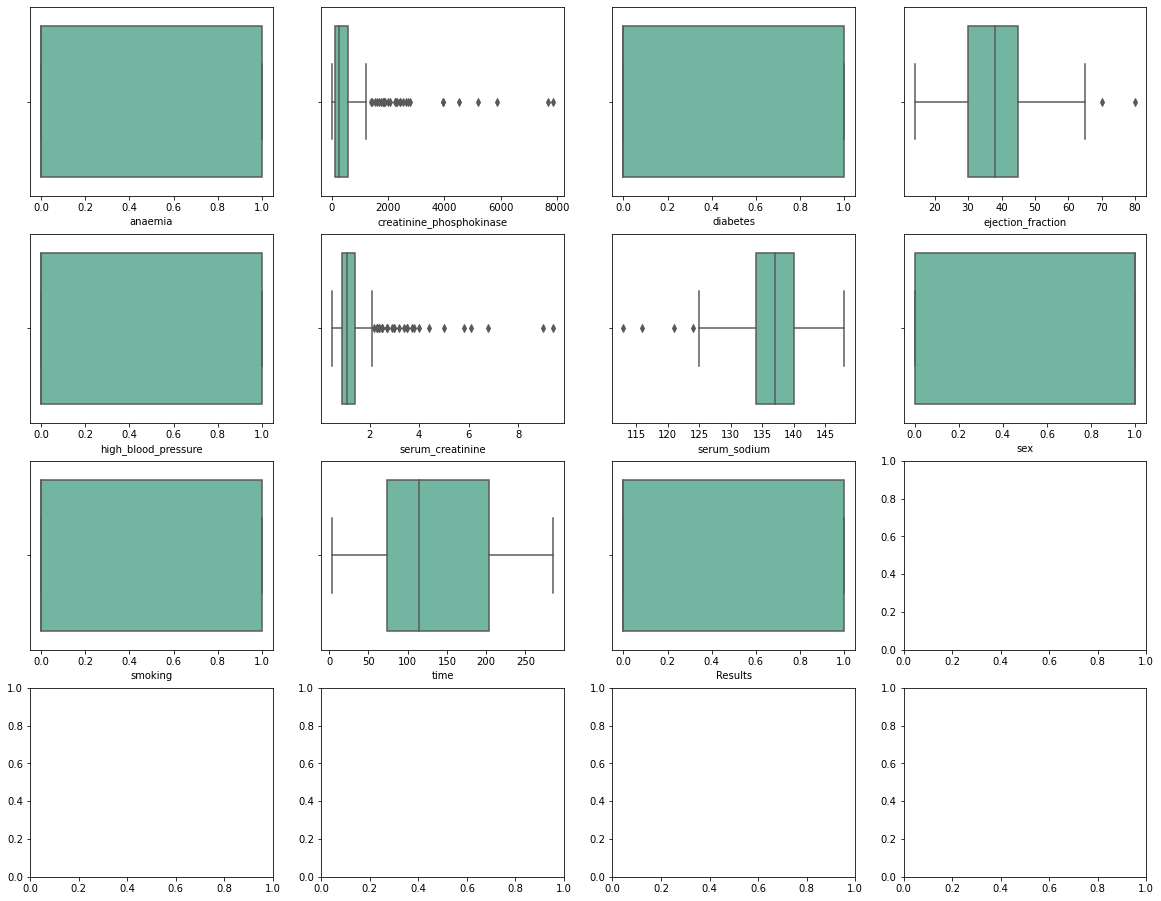

In [6]:
fig, axes = plt.subplots(4,4, figsize=(20,16))
x_,y_ = 0,0
for i, column in enumerate(df_01.columns[0:]):    
    sb.boxplot(x=df_01[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    else:
        y_ += 1

In [7]:
cols = df_01.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df_01)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time', 'Results'],
      dtype='object')
   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0      0.0                  0.071319       0.0           0.090909   
1      0.0                  1.000000       0.0           0.363636   
2      0.0                  0.015693       0.0           0.090909   
3      1.0                  0.011227       0.0           0.090909   
4      1.0                  0.017479       1.0           0.090909   

   high_blood_pressure  serum_creatinine  serum_sodium  sex  smoking  \
0                  1.0          0.157303      0.485714  1.0      0.0   
1                  0.0          0.067416      0.657143  1.0      0.0   
2                  0.0          0.089888      0.457143  1.0      1.0   
3                  0.0          0.157303      0.685714  1.0      0.0   
4            

In [8]:
x = df_02.drop(["Results"], axis =1);
y = df_02["Results"]
print(y.value_counts())

0.0    203
1.0     96
Name: Results, dtype: int64


(array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

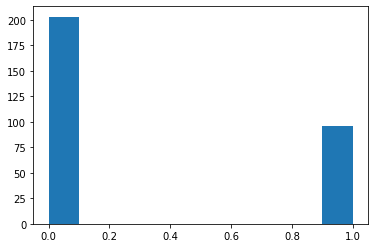

In [9]:
plt.hist(y)

0.0    137
1.0     96
Name: Results, dtype: int64


(array([137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  96.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

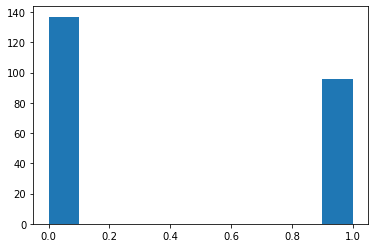

In [10]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7,random_state = 0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    137
1.0    137
Name: Results, dtype: int64


(array([137.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

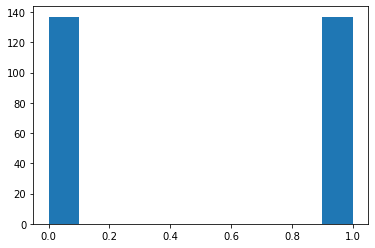

In [11]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [12]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  70.438
Standed deviation :  2.555
CV value :  3
Parameters :  {}
Accuracy :  74.466
Standed deviation :  4.140
CV value :  4
Parameters :  {}
Accuracy :  76.263
Standed deviation :  5.166
CV value :  5
Parameters :  {}
Accuracy :  77.744
Standed deviation :  4.329


In [13]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 1}
Accuracy :  73.358
Standed deviation :  6.934
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  78.440
Standed deviation :  6.908
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  79.529
Standed deviation :  8.815
CV value :  5
Parameters :  {'random_state': 3}
Accuracy :  78.492
Standed deviation :  8.438


In [14]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 3}
Accuracy :  63.504
Standed deviation :  0.730
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  67.491
Standed deviation :  6.409
CV value :  4
Parameters :  {'n_neighbors': 3}
Accuracy :  68.963
Standed deviation :  7.994
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  68.283
Standed deviation :  11.291


In [15]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  71.898
Standed deviation :  4.745
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  75.876
Standed deviation :  7.081
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  73.279
Standed deviation :  12.723
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  74.438
Standed deviation :  9.867


In [16]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  70.438
Standed deviation :  6.204
CV value :  3
Parameters :  {}
Accuracy :  72.579
Standed deviation :  9.776
CV value :  4
Parameters :  {}
Accuracy :  70.759
Standed deviation :  6.142
CV value :  5
Parameters :  {}
Accuracy :  72.249
Standed deviation :  15.256


In [17]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  72.263
Standed deviation :  3.650
CV value :  3
Parameters :  {'kernel': 'linear'}
Accuracy :  75.143
Standed deviation :  7.703
CV value :  4
Parameters :  {'kernel': 'linear'}
Accuracy :  75.101
Standed deviation :  13.032
CV value :  5
Parameters :  {'kernel': 'linear'}
Accuracy :  75.178
Standed deviation :  10.073


In [18]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 300}
Accuracy :  76.277
Standed deviation :  6.204
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  84.651
Standed deviation :  5.035
CV value :  4
Parameters :  {'max_depth': 90, 'max_features': 3, 'n_estimators': 100}
Accuracy :  85.379
Standed deviation :  5.537
CV value :  5
Parameters :  {'max_depth': 90, 'max_features': 2, 'n_estimators': 100}
Accuracy :  85.057
Standed deviation :  5.762
